In [1]:
%load_ext watermark
%watermark -a "Chibuzor Enyioko" -d -v -p numpy,pandas,matplotlib,seaborn,sklearn

Author: Chibuzor Enyioko

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.5.0

numpy     : 2.3.3
pandas    : 2.3.2
matplotlib: 3.10.6
seaborn   : 0.13.2
sklearn   : 1.7.2



# Project 1: Decision Trees with Zombies

This notebook explores the zombie data set in order to develop a decision tree model that predicts whether an individual is infected or not based on patterns observed in the provided features. 

## Part 1: Descriptive Analysis

To build a foundation for understanding the data, a descriptive analysis is performed. A histogram of each feature is used to examine their distributions and identify potential relationships.

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

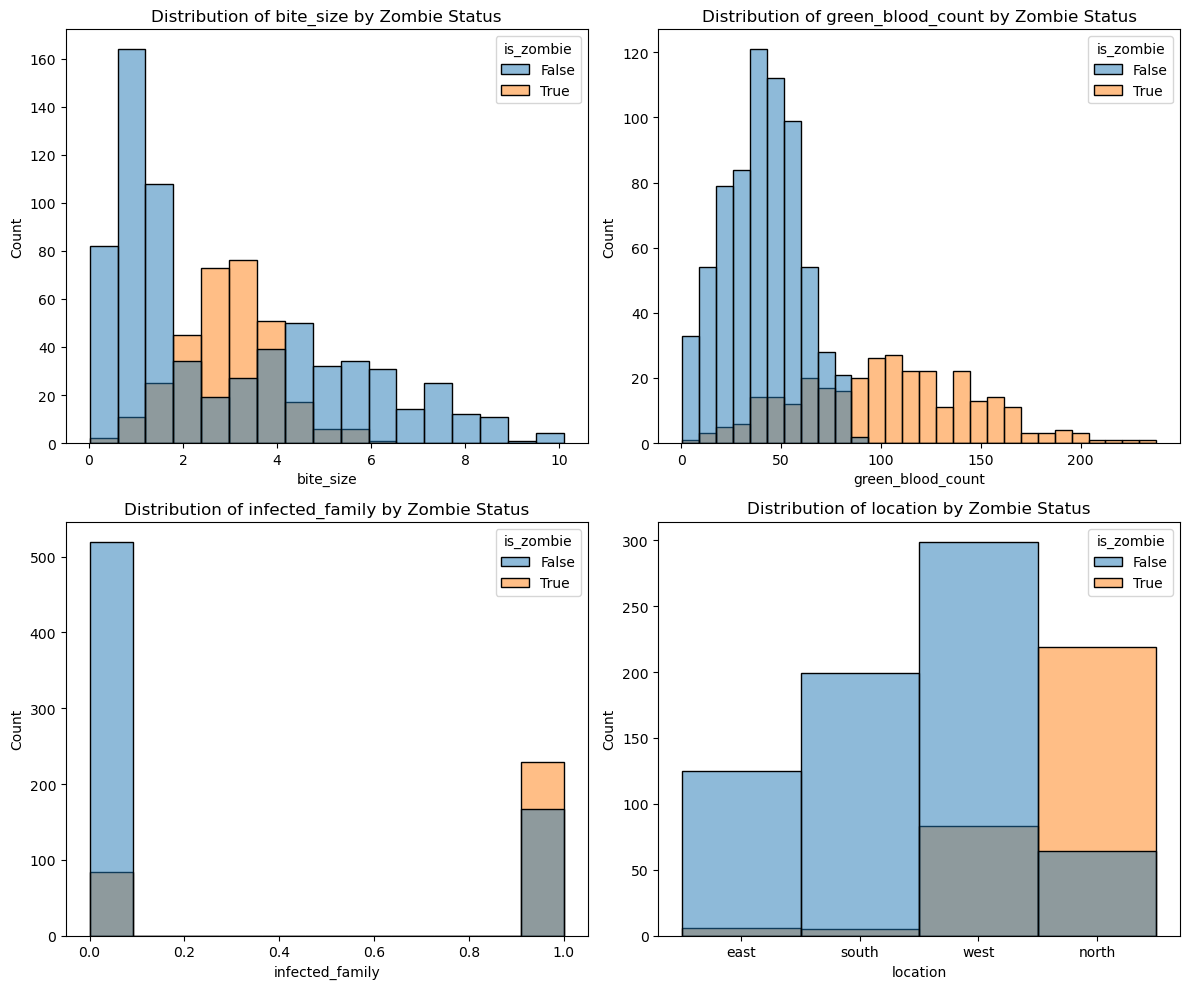

In [10]:
# imoprt zombie training dataset
train_df = pd.read_csv('training.csv')

plt_columns = ['bite_size','green_blood_count','infected_family','location']

# create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(plt_columns):
    sns.histplot(train_df, x=col, hue='is_zombie', kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Zombie Status')

plt.tight_layout()
plt.show()

### Summary

From the data, it is observed that:
- Individuals with bites about 2-4 inches wide are likely zombies
- Individuals with <80 cells per thousand is are most likely safe
- Infected family memebers increases the likelihood of being a zombie
- An individual from the North side of the city is likely to be infected
- Green blood and being from the North may carry significant weight in predicting zombie infection

## Part 2: Making the Decision Tree
### Bulding the Model
From here, a model is built based on the training set.


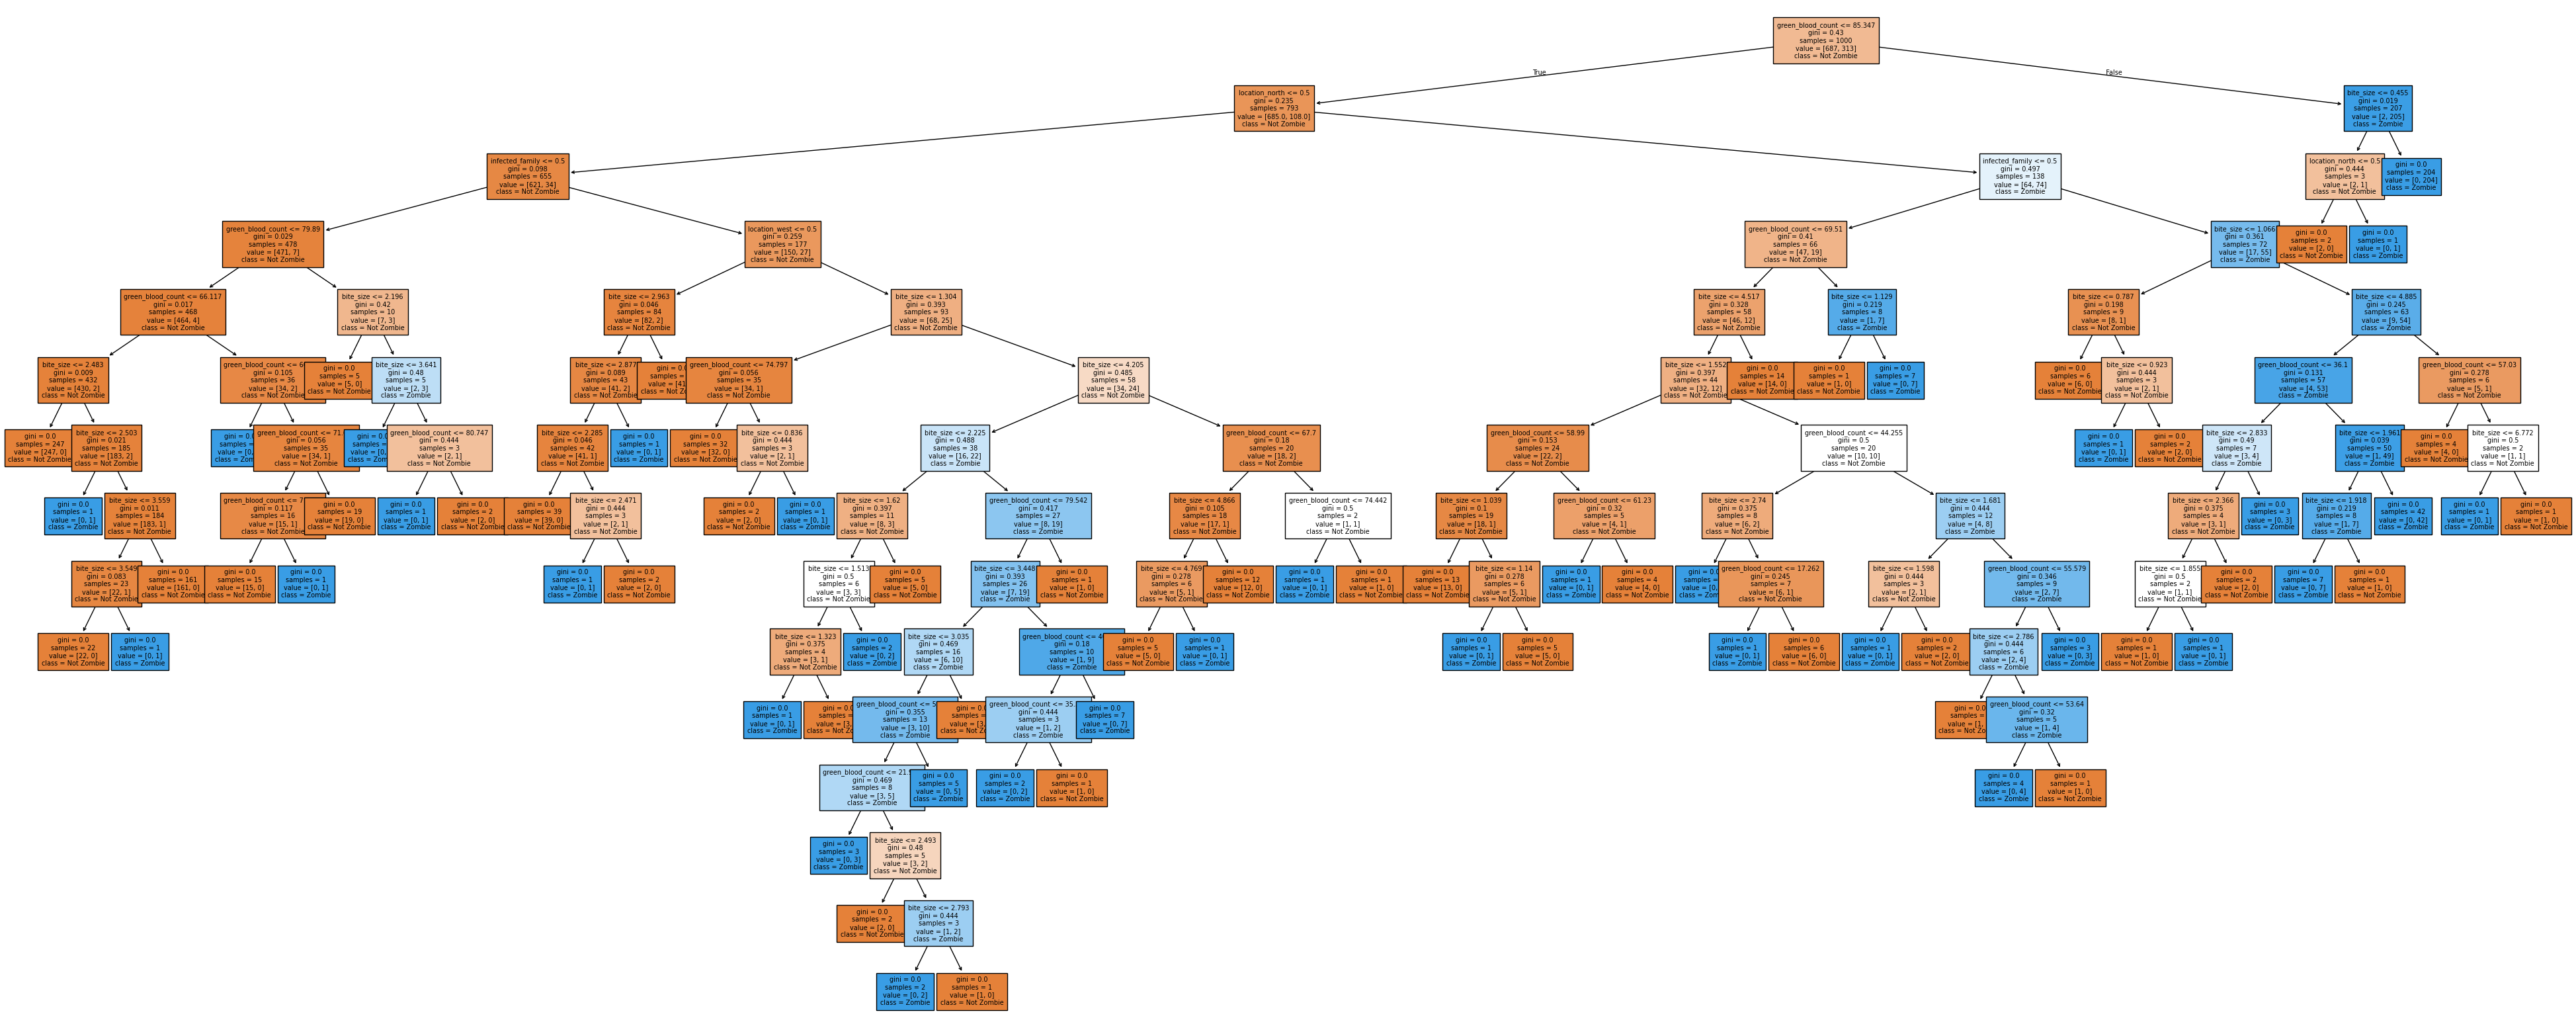

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


x = train_df.drop(columns=['is_zombie'])
y = train_df['is_zombie']

# encode categorical variables as numeric values
x_encoded = pd.get_dummies(x, drop_first=False)

# fitting the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_encoded, y)

# visualize the decision tree
plt.figure(figsize=(50,20))
plot_tree(clf, feature_names=x_encoded.columns, class_names=['Not Zombie', 'Zombie'], filled=True, fontsize=7)
plt.show()  


## Part 3: Evaluating the model
Now that the model is built, it will be applied to the testing set to determine its accuracy.

In [5]:
#import the testing dataset
test_df = pd.read_csv('testing.csv')
x_test = test_df.drop(columns=['is_zombie'])
y_test = test_df['is_zombie']
x_test_encoded = pd.get_dummies(x_test, drop_first=False)

# make predictions on the test set
y_pred = clf.predict(x_test_encoded)

#### Confusion Matrix & Classification Report
A confusion matrix and classification display is generated to understand the evaluation:

              precision    recall  f1-score   support

  Not Zombie      0.939     0.932     0.936       666
      Zombie      0.867     0.880     0.874       334

    accuracy                          0.915      1000
   macro avg      0.903     0.906     0.905      1000
weighted avg      0.915     0.915     0.915      1000



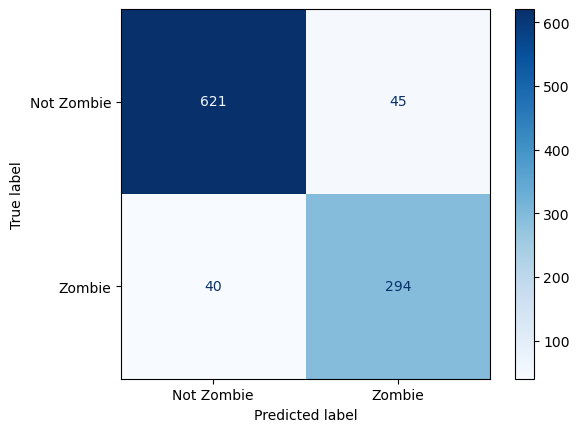

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# view the classification report
print(classification_report(y_test, y_pred, target_names=['Not Zombie', 'Zombie'], digits=3))

# print the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Zombie', 'Zombie'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


#### Feature Importance
Some code that displays the significance of the features given to the model.
<a id='feature importance'></a>

In [27]:
importances = clf.feature_importances_
feature_names = x_encoded.columns

# table visual of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display of table
print(importance_df)

             Feature  Importance
1  green_blood_count    0.643426
0          bite_size    0.172203
4     location_north    0.124342
2    infected_family    0.047708
6      location_west    0.012321
3      location_east    0.000000
5     location_south    0.000000


## Part 4: Questions from the assignnment
### Q1-5

#### 1. What is the overall accuracy of the classifier? 

The overall accuracy of the classifier is **0.915, or 91.5%.**

#### 2. How many (a) false positives and (b) false negatives are there?

There were **45 false positives** and **40 false negatives.**

#### 3. What did the decision tree decide is the most important initial variable (i.e., the one at the 
top of the tree)? 

The decision tree decided **green blood count** to be the most important initial variable.

#### 4. How many different times was this variable used?

This variable was used **29 times** in the model.

#### 5. Were all the variables used by the decision tree? 

**No**, from the [Feature Importance](#feature-importance) table, variable "location: South" and "location: East" was not used by the decision tree.


### Q6-10

#### 6. What is the accuracy of 5-fold cross validation?  

In [35]:
# creating a cross validation model
from sklearn.model_selection import cross_validate, StratifiedKFold

cv = StratifiedKFold(n_splits=5)
cv_results = cross_validate(clf, x_encoded, y, cv=cv)

# printing the mean accuracy from cross validation
test_mean = cv_results['test_score'].mean()
print(f'The mean accuracy from 5-fold cross validation is about: {test_mean:.3f}')


The mean accuracy from 5-fold cross validation is about: 0.925


#### 7. What is the accuracy if you remove the bite_size feature, re-train, and re-test on the full testing set?

In [31]:
# remove the bite_size feature on training
x_encoded_no_bite = x_encoded.drop(columns=['bite_size'])
clf_no_bite = DecisionTreeClassifier()
clf_no_bite.fit(x_encoded_no_bite, y)   

# test on the testing set without bite_size
x_test_no_bite = x_test_encoded.drop(columns=['bite_size'])
y_pred_no_bite = clf_no_bite.predict(x_test_no_bite)

# view the classification report
print(classification_report(y_test, y_pred_no_bite, target_names=['Not Zombie', 'Zombie'], digits=3))

              precision    recall  f1-score   support

  Not Zombie      0.913     0.919     0.916       666
      Zombie      0.836     0.826     0.831       334

    accuracy                          0.888      1000
   macro avg      0.875     0.873     0.874      1000
weighted avg      0.888     0.888     0.888      1000



The accuracy lowers to **88.8%**

#### 8. More data is better, but what about duplicate data?  TRIPLE the size of the training data, 
such that every training instance is in the data three times, then re-train the model.  What 
is the accuracy?

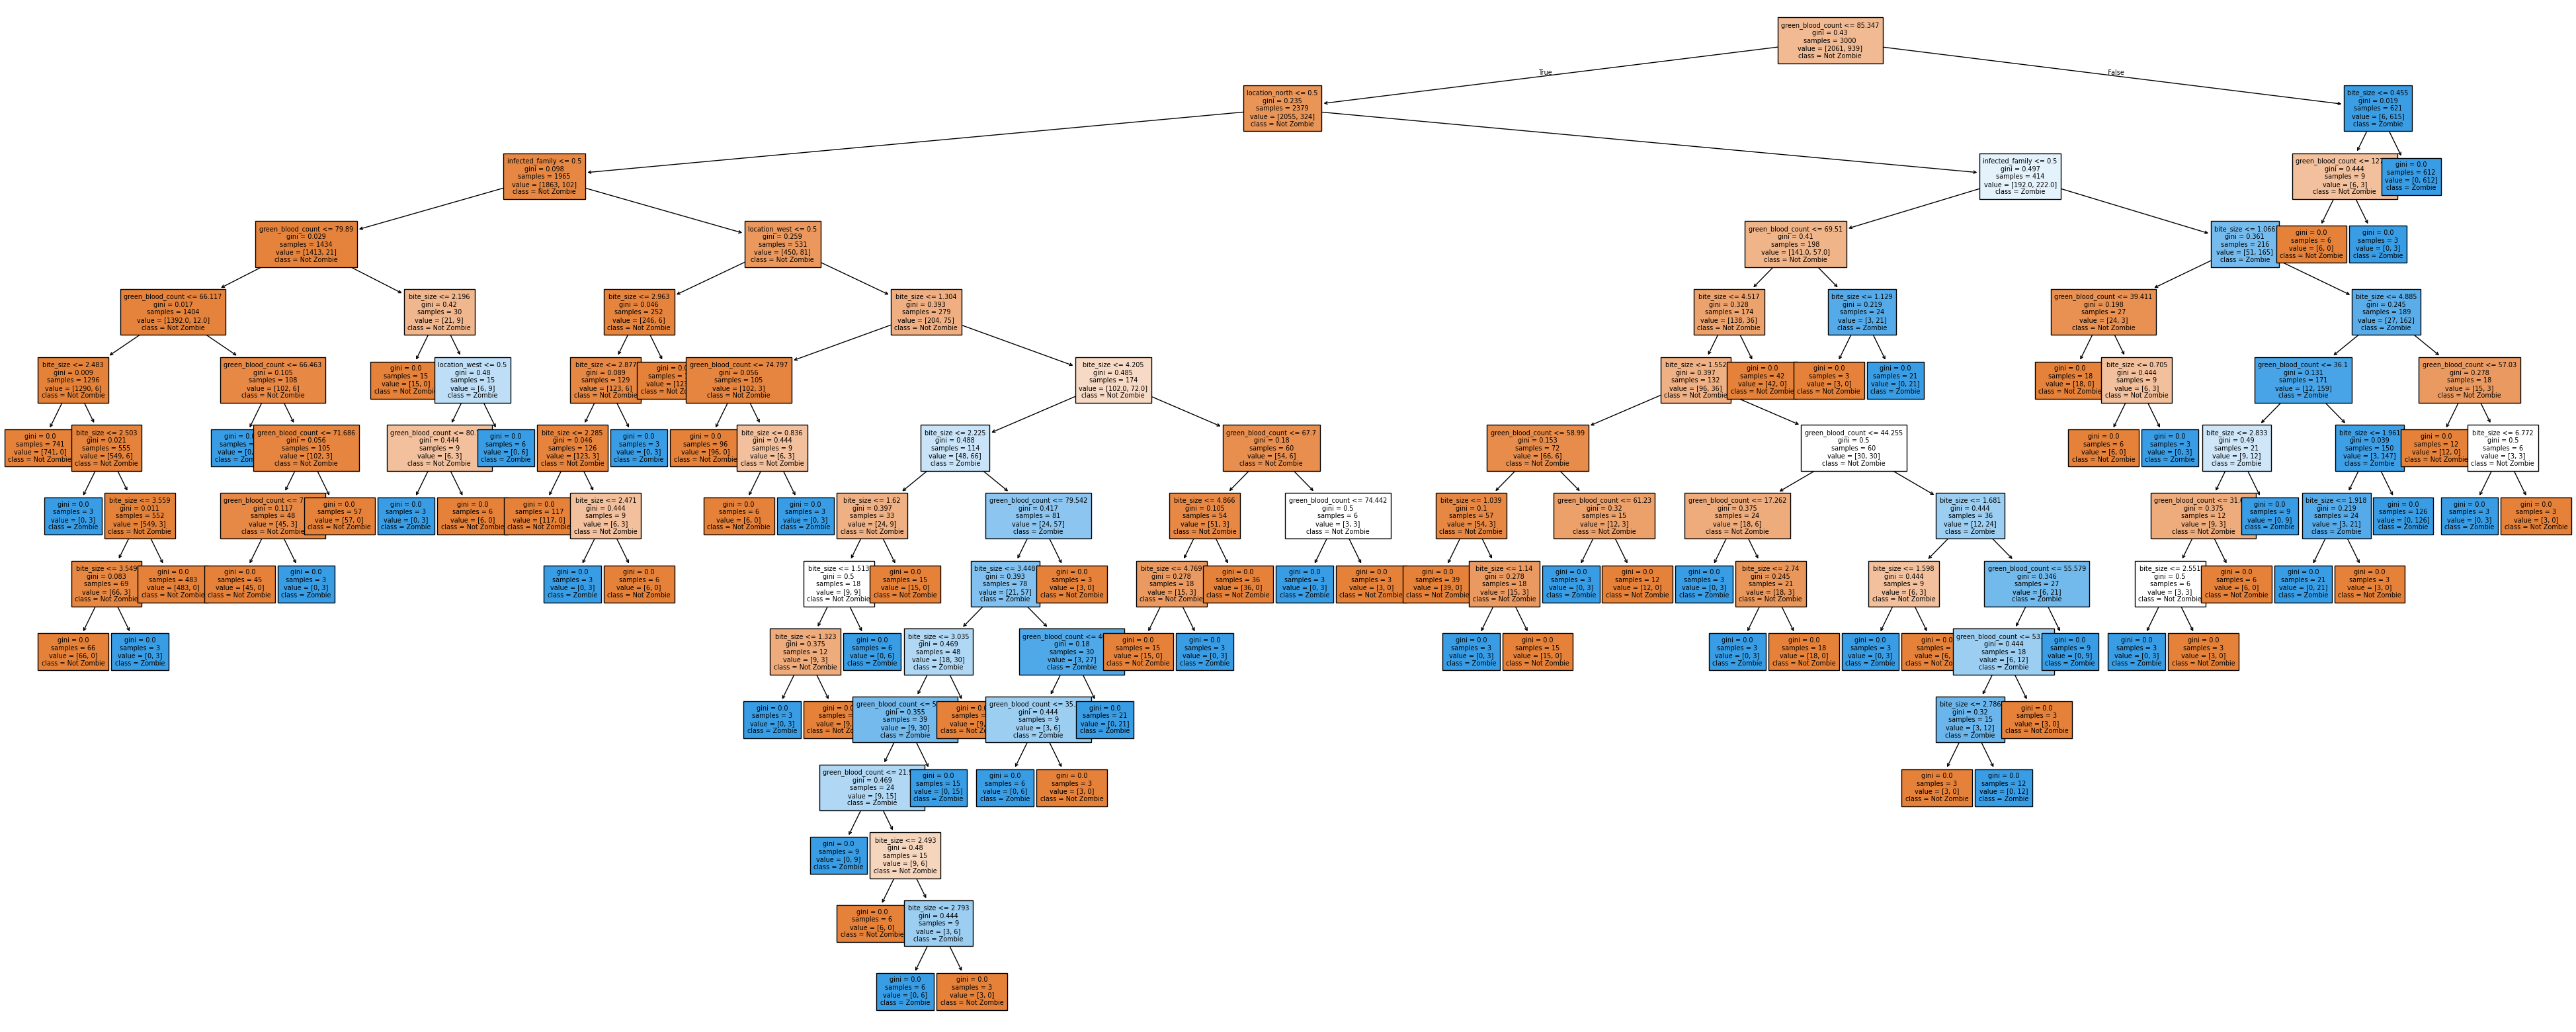

In [41]:
tripled_train_df = pd.read_csv('training_tripled.csv')

x_triple = tripled_train_df.drop(columns=['is_zombie'])
y_triple = tripled_train_df['is_zombie']

# encode categorical variables as numeric values
tri_x_encoded = pd.get_dummies(x_triple, drop_first=False)

# fitting the decision tree classifier

clf_tripled = DecisionTreeClassifier()
clf_tripled.fit(tri_x_encoded, y_triple)

# test tripled model
y_pred_triple = clf_tripled.predict(x_test_encoded)

plt.figure(figsize=(50,20))
plot_tree(clf_tripled, feature_names=x_encoded.columns, class_names=['Not Zombie', 'Zombie'], filled=True, fontsize=7)
plt.show()  

In [24]:
# creating a classification report
print(classification_report(y_test, y_pred_triple, target_names=['Not Zombie', 'Zombie'], digits=3))

              precision    recall  f1-score   support

  Not Zombie      0.936     0.937     0.936       666
      Zombie      0.874     0.871     0.873       334

    accuracy                          0.915      1000
   macro avg      0.905     0.904     0.904      1000
weighted avg      0.915     0.915     0.915      1000



#### 9. Is the decision tree more complicated than before, less complicated than before, or the same as before tripling the data?


##### Initial data set
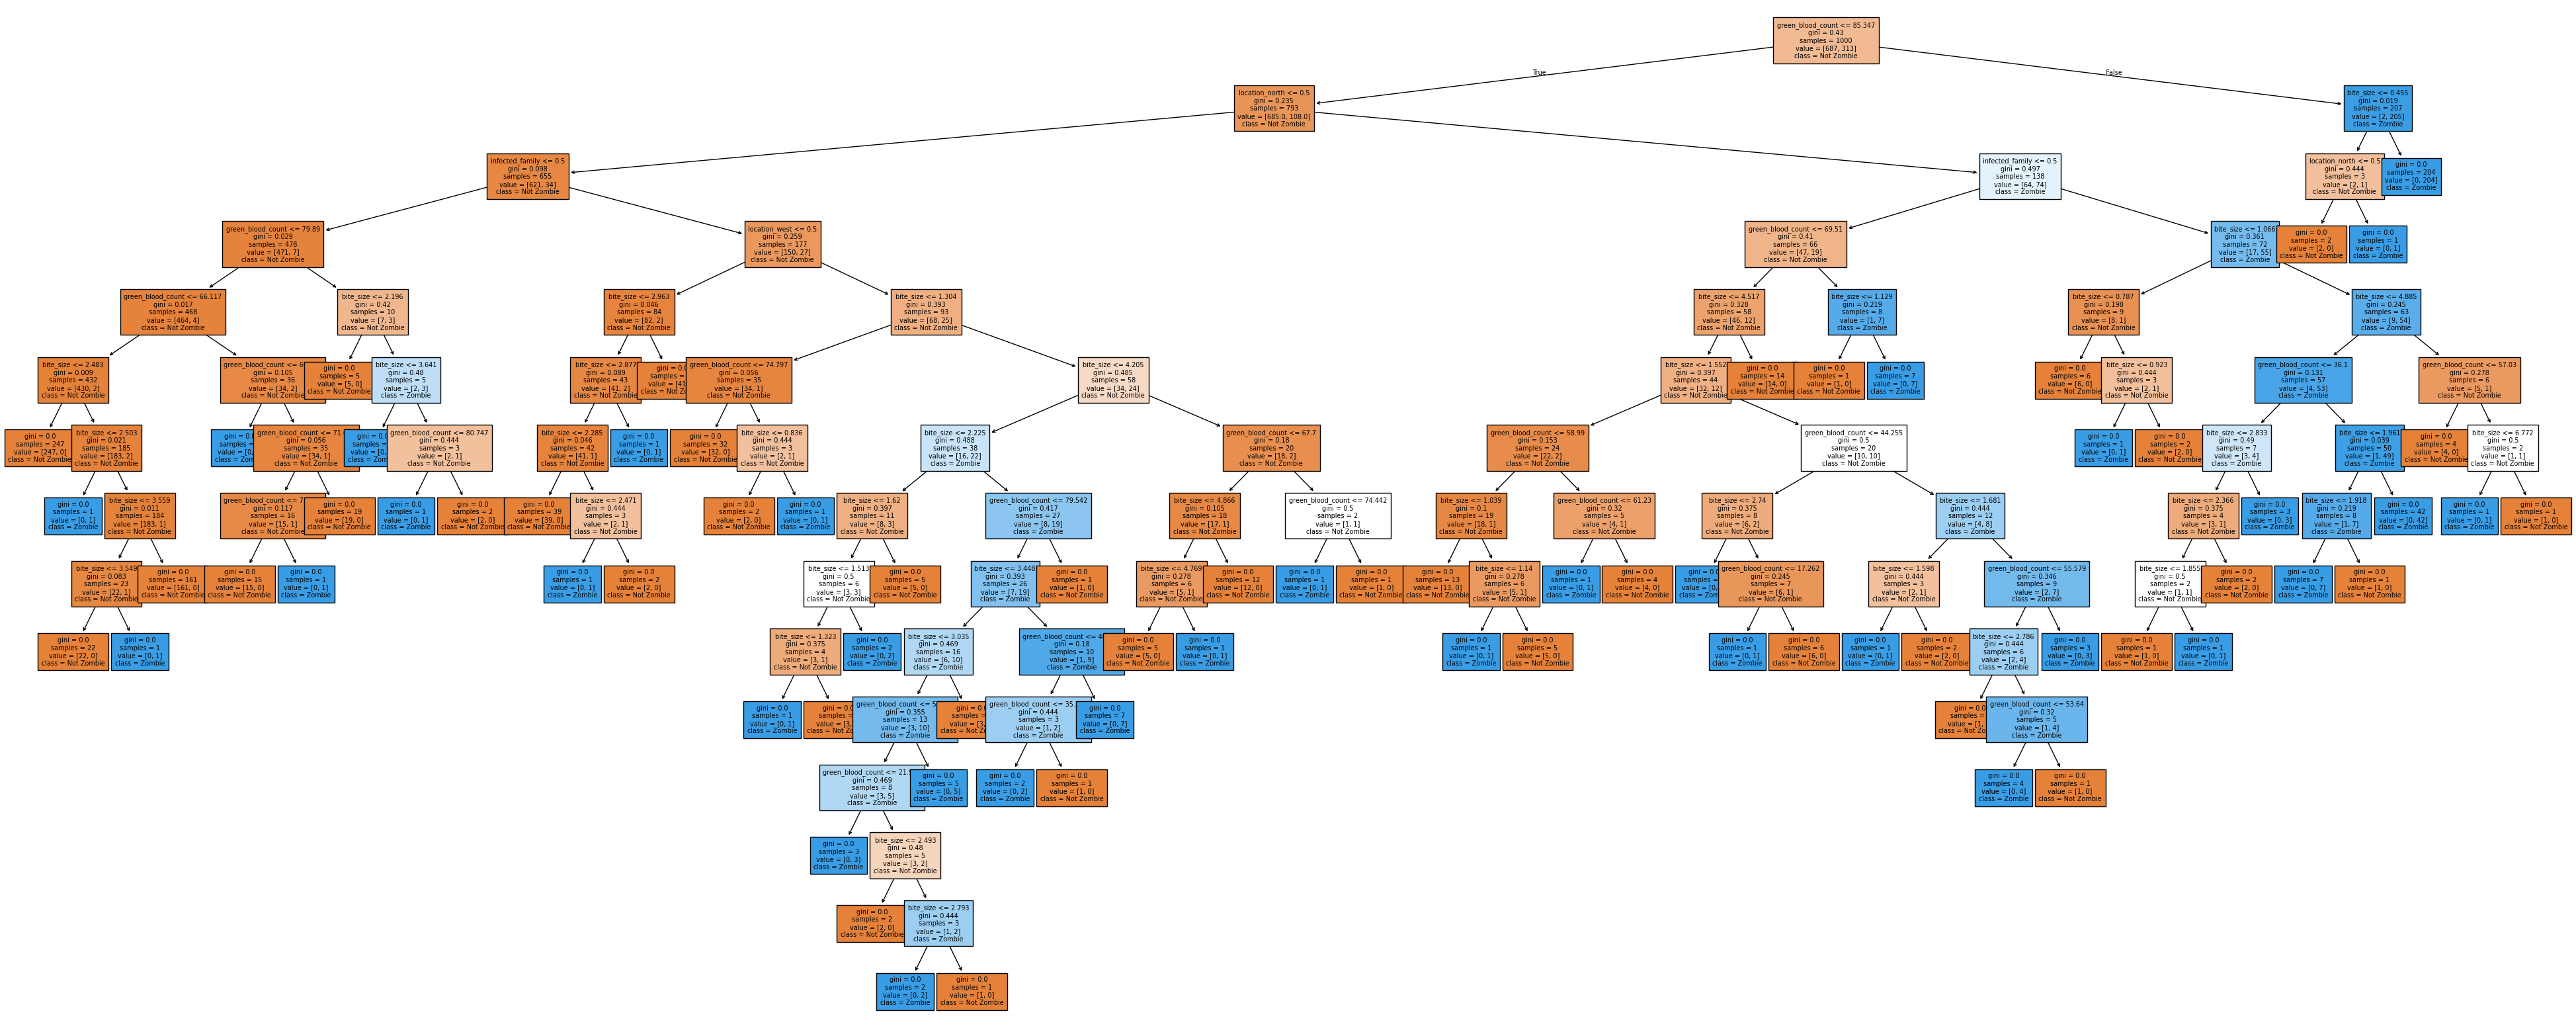

##### Tripled data set
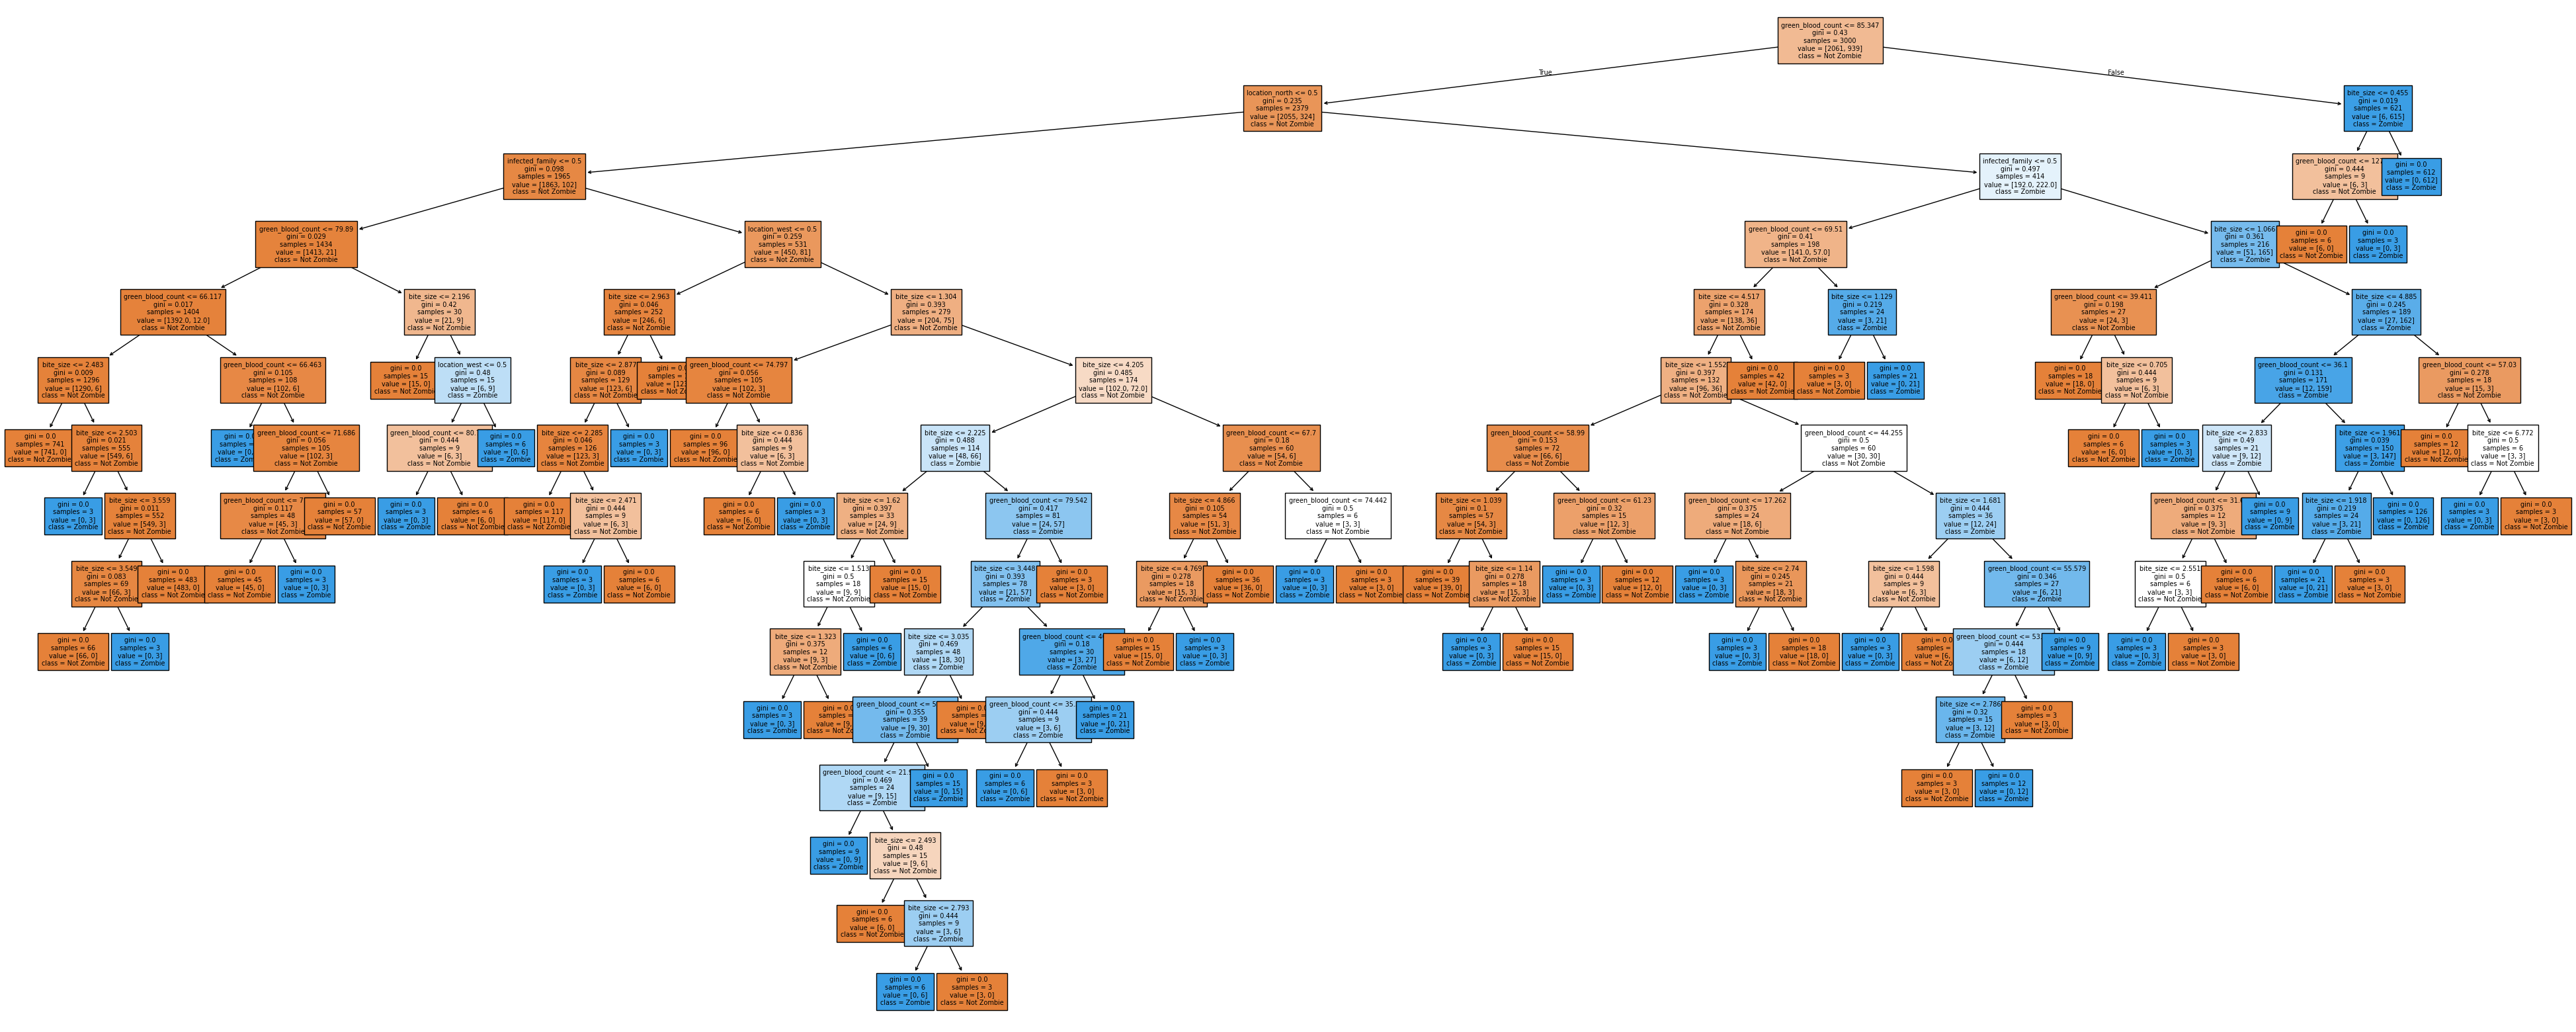

The models looks the same, despite the training set being tripled.

#### 10. Using the model generated after removing bite_size (Question 7), generate two scatter plots: one with the correctly classified instances and one with the misclassified instances. Both scatter plots should have “bite_size” on the x-axis and “green_blood_count” on the y-axis. Paste screenshots of the scatter plots into your response and describe what you notice in terms of the separation of the data between the two plots.


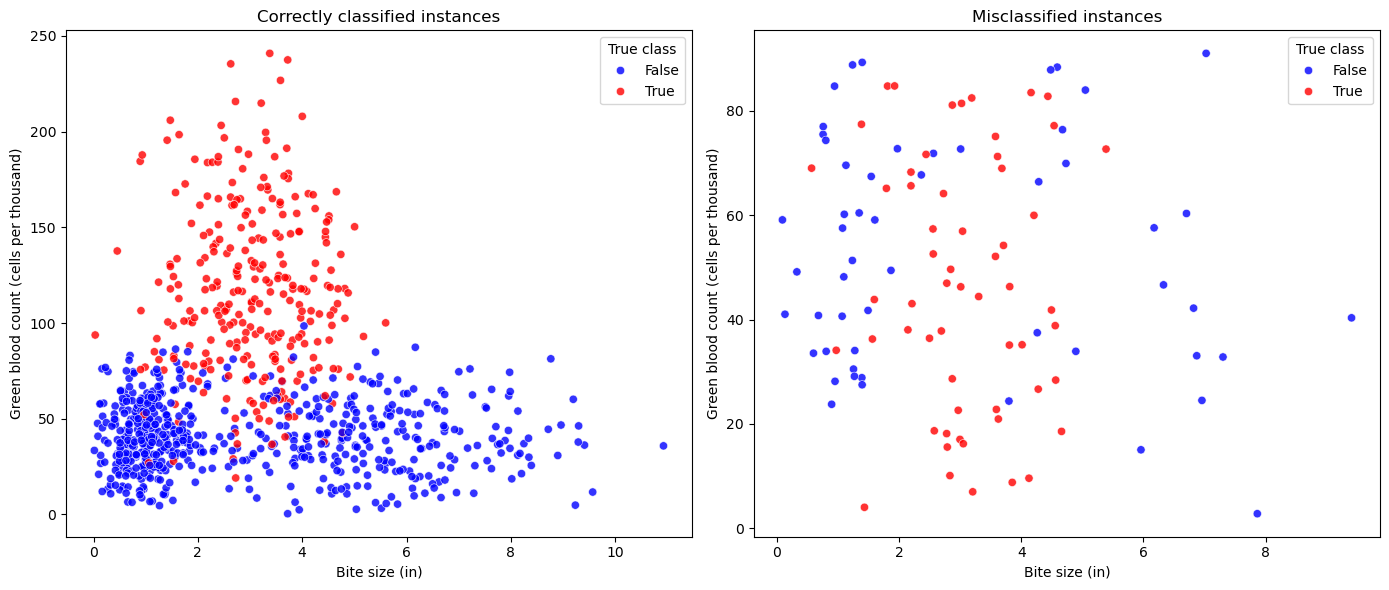

In [ ]:
# Prepare a DataFrame with true labels, predictions, and a correctness flag
plot_df = x_test.copy()
plot_df = plot_df.assign(true=y_test.values, pred=y_pred_no_bite)
plot_df['correct'] = plot_df['true'] == plot_df['pred']

# Plot correctly classified vs misclassified instances side-by-side
plt.figure(figsize=(14,6))
# Correctly classified
plt.subplot(1,2,1)
sns.scatterplot(data=plot_df[plot_df['correct']], x='bite_size', y='green_blood_count', hue='true', palette={0:'blue',1:'red'}, alpha=0.8)
plt.xlabel('Bite size (in)')
plt.ylabel('Green blood count (cells per thousand)')
plt.title('Correctly classified instances')
plt.legend(title='True class')

# Misclassified
plt.subplot(1,2,2)
sns.scatterplot(data=plot_df[~plot_df['correct']], x='bite_size', y='green_blood_count', hue='true', palette={0:'blue',1:'red'}, alpha=0.8)
plt.xlabel('Bite size (in)')
plt.ylabel('Green blood count (cells per thousand)')
plt.title('Misclassified instances')
plt.legend(title='True class')

plt.tight_layout()
plt.show()
